# Parameter identification example

Here is a simple toy model that we use to demonstrate the working of the inference package

$\emptyset \xrightarrow[]{k_1} X \; \; \; \; X \xrightarrow[]{d_1} \emptyset$

### Run the MCMC algorithm to identify parameters from the experimental data 

Sample log-like: 348.31866267808067
Sample log-like: 348.3801805948416
Sample log-like: 348.39005317561663
Sample log-like: 348.2088161230738
Sample log-like: 348.3513339705724
Sample log-like: 348.2611134065702
Sample log-like: 348.323498626604
Sample log-like: 348.3888713522826
Sample log-like: 348.35173582652453
Sample log-like: 348.3852930963395
Sample log-like: 348.32925267830353
Sample log-like: 348.23597918215233
Sample log-like: 348.3975517962319
Sample log-like: 348.3047877811491
Sample log-like: 348.39730765247486
Sample log-like: 348.3886765311241
Sample log-like: 348.3293955586739
Sample log-like: 348.353955623326
Sample log-like: 348.37597136132945
Sample log-like: 348.1978080734908
Sample log-like: 348.34175857809856
Sample log-like: 348.39692114830785
Sample log-like: 348.30033789336824
Sample log-like: 348.3147637716199
Sample log-like: 348.29549471434933
Sample log-like: 348.4030481872831
Sample log-like: 348.2365883295756
Sample log-like: 348.38716263294845
Sample log

c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\emcee\ensemble.py:335: RuntimeWarning: invalid value encountered in subtract
  lnpdiff = (self.dim - 1.) * np.log(zz) + newlnprob - lnprob0
c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\emcee\ensemble.py:336: RuntimeWarning: invalid value encountered in greater
  accept = (lnpdiff > np.log(self._random.rand(len(lnpdiff))))
c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\_continuous_distns.py:77: RuntimeWarning: overflow encountered in square
  return np.exp(-x**2/2.0) / _norm_pdf_C
c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\bioscrape\pid_interfaces.py:151: RuntimeWarning: overflow encountered in exp
  params_exp = np.exp(log_params)


Successfully completed MCMC parameter identification procedure. Parameter distribution data written to mcmc_results.csv file


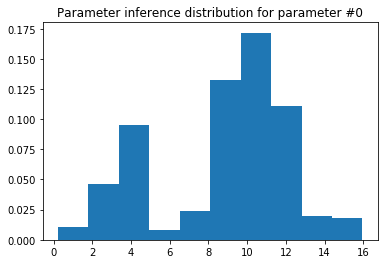

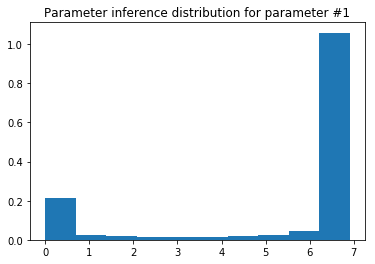

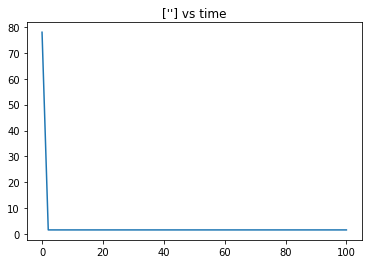

In [2]:
%matplotlib inline
import bioscrape as bs
from bioscrape.types import Model
from bioscrape.simulator import py_simulate_model
from bioscrape.pid_interfaces import *
from bioscrape.emcee_interface import *
import numpy as np
import pylab as plt
import pandas as pd

pid = initialize_mcmc()
# Import bioscrape XML / bioscrape model object M / SBML file
# M  = bs.types.read_model_from_sbml(filename)
pid.M = Model('models/toy_model.xml')


# Import data from CSV
data_list = []
data = pd.read_csv('test_data.csv', delimiter = '\t', names = ['X', 'time'], skiprows = 1)
data_list.append(list(data.get('X')))
pid.exp_data = np.array(data_list)


pid.prior = {'k1' : ['uniform', 1e-2, 1e3],'d1' : ['gaussian', 0.2, 100, 1e-3]}
pid.params_to_estimate = {'k1':10, 'd1':0.2}
pid.timepoints = np.linspace(0, 100, 50)

pid.type = 'deterministic'


fitted_model, params = pid.run_mcmc(plot_show = True, progress = False)

### Plot the results 

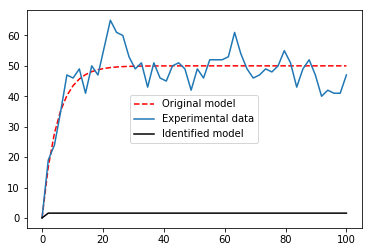

In [9]:
timepoints = pid.timepoints
M_original = Model('toy_model.xml')
sim_x = py_simulate_model(timepoints, Model = M_original, stochastic = False)
sim_x_inf = py_simulate_model(timepoints, Model = fitted_model, stochastic = False)
plt.plot(timepoints, sim_x['X'], 'r--', label = 'Original model')
plt.plot(timepoints, data.get('X'), label = 'Experimental data')
plt.plot(timepoints, sim_x_inf['X'], 'k', label = 'Identified model')

plt.legend()

## Alll methods above have other advanced options that you can use. Refer to Parameter Identification Tools notebook for more details. There are many other tools available such as for multiple initial conditions and timepoints for each trajectory, options for the estimator etc.

In [5]:
data

,X,time
0,0.0,0.000000
1,19.0,2.040816
2,24.0,4.081633
3,35.0,6.122449
4,47.0,8.163265
5,46.0,10.204082
6,49.0,12.244898
7,41.0,14.285714
8,50.0,16.326531
9,47.0,18.367347


In [40]:
pid.timepoints.shape[0]

50

In [9]:
ss = pid.M.get_species_dictionary()
res = dict.fromkeys(ss, 0) 

In [10]:
res

{('X', 0.0): 0}

In [6]:
M = pid.M
A = M.get_species_array()

{(s, A[M.species2index[s]]) for s in M.species2index}

AttributeError: 'bioscrape.types.Model' object has no attribute 'species2index'